In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [40]:
df= pd.read_csv("WalmartDataSet.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [42]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [45]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [47]:
df.Store.value_counts()

Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: count, dtype: int64

In [48]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [49]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [50]:
df.duplicated().sum()

0

In [51]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

866808.5549999999


In [52]:
outlier_threshold = 1.5 * IQR

df_trimmed = df[(df['Weekly_Sales'] >= Q1 - outlier_threshold) & (df['Weekly_Sales'] <= Q3 + outlier_threshold)]

In [53]:
print(df.shape)
print(df_trimmed.shape)

(6435, 8)
(6401, 8)


In [54]:
df.Store.value_counts()

Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: count, dtype: int64

## <span style="color:orange; font-family:bold"> Observations:
- We have equal data for all stores.
- There are no NaN/Null Values.
- There are no duplicate values.
- There does not seem to be a lot of outliers but removing the outliers might impact sales forecast as it will delete random data from time series.

# <span style="color:lime"> EDA

In [55]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,6435.0,23.0,1.0,12.0,23.0,34.0,45.0,12.988182
Date,6435,2011-06-17 00:00:00,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,6435.0,1046964.877562,209986.25,553350.105,960746.04,1420158.66,3818686.45,564366.622054
Holiday_Flag,6435.0,0.06993,0.0,0.0,0.0,0.0,1.0,0.255049
Temperature,6435.0,60.663782,-2.06,47.46,62.67,74.94,100.14,18.444933
Fuel_Price,6435.0,3.358607,2.472,2.933,3.445,3.735,4.468,0.45902
CPI,6435.0,171.578394,126.064,131.735,182.616521,212.743293,227.232807,39.356712
Unemployment,6435.0,7.999151,3.879,6.891,7.874,8.622,14.313,1.875885


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [57]:
## Range of Data
print(f"Minimum date in dataset is - {df['Date'].min()}")
print(f"Maximum date in dataset is - {df['Date'].max()}")

Minimum date in dataset is - 2010-02-05 00:00:00
Maximum date in dataset is - 2012-10-26 00:00:00


In [58]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [59]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667


#### <span style="color:magenta">1>a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

Text(0.5, 0, 'Unemployment')

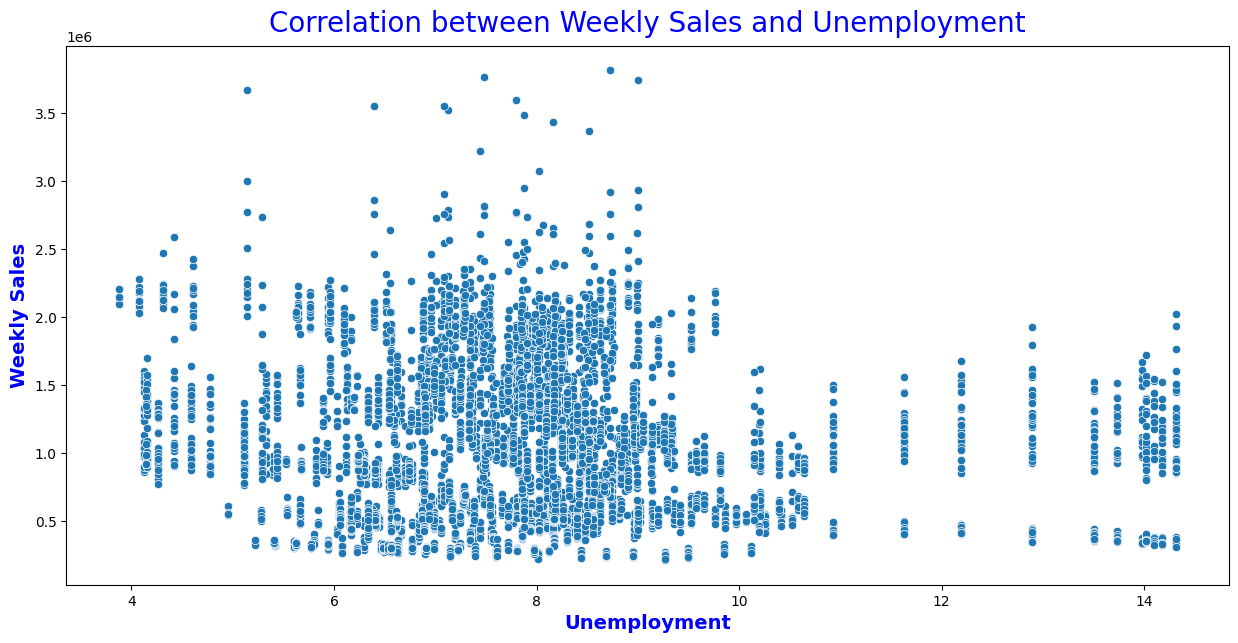

In [60]:
plt.figure(figsize=(15,7))
# sns.scatterplot(x="Weekly_Sales", y="Unemployment", data=df, hue="Store")
sns.scatterplot(x="Unemployment", y="Weekly_Sales", data=df)

plt.title('Correlation between Weekly Sales and Unemployment', color='blue', fontsize=20, pad=10)

plt.ylabel('Weekly Sales', color='blue',  fontweight='bold', fontsize=14)
plt.xlabel('Unemployment', color='blue',  fontweight='bold', fontsize=14)


##  <span style="color:orange; font-family:bold"> Observations from the Scatterplot:
-   High unemployment rate (10-14+ %) have seen less weekly sales volume.
-   For low and medium unemployment rate(4-9) we have comparitively higher weekly sales.

In [61]:
## Let's check the correlation between weekly sales and unemployment rate
corr= df["Weekly_Sales"].corr(df["Unemployment"])
print("Correlation Coefficient b/w  weekly sales and unemployment - ", corr)

Correlation Coefficient b/w  weekly sales and unemployment -  -0.10617608965795416


## <span style="color:orange; font-family:bold"> Observations
-  The correlation coefficient of -0.106 suggests a weak negative correlation between weekly sales and unemployment.

In [62]:
## Let's check which stores are suffering the most due to unemployment i.e which have highest negative corr.
stores_corr = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().unstack()

In [63]:
top_5= stores_corr['Weekly_Sales']['Unemployment'].sort_values()[:5]
top_5

Store
38   -0.785290
44   -0.780076
39   -0.384681
42   -0.356355
41   -0.350630
Name: Unemployment, dtype: float64

In [64]:
print("Top 5 stores impacted by unemployment are - \n", *top_5.index)

Top 5 stores impacted by unemployment are - 
 38 44 39 42 41


#### <span style="color:magenta">1>b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [65]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [66]:
df.Date.value_counts()

Date
2010-02-05    45
2011-12-23    45
2011-11-11    45
2011-11-18    45
2011-11-25    45
              ..
2011-01-07    45
2011-01-14    45
2011-01-21    45
2011-01-28    45
2012-10-26    45
Name: count, Length: 143, dtype: int64

In [67]:
# First lets check for sum of sales. Though this will not be appropriate since each store's seasonality may vary.

df_total_time_series= df.groupby('Date')[["Weekly_Sales"]].sum()

In [68]:
df_total_time_series.head()

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30


<Axes: xlabel='Date'>

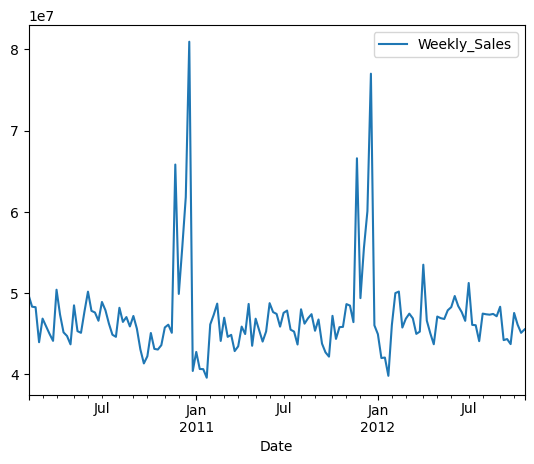

In [69]:
df_total_time_series.plot()

## <span style="color:orange; font-family:bold"> Observations
-   Looking at the graph it does seems like there is seasonality over a year i.e 12 months
-   Sales are higher during Winters.
-   Assuming the reasons for this seasonality:
        
        ->   People might not want to wander outside much during winters so they buy more in some months so they don;t have to go out again and again. Compare to buying in Summer, products might get affescted by temp so people go to buy stuff only when needed.
       
        ->  Main selling product might be the one that has higher sale in Winters like Jackets(warm clothes), Hot Beverages etc.
       
        ->  Months like Oct, Nov, Dec, Jan mark festival season like Dussehra, Diwali(Specific to India), Christmas, New Year Eve which may cause sudden incresase in sales for Walmart.

In [70]:
## Let's decompose to gain more insights
from statsmodels.tsa.seasonal import seasonal_decompose

In [71]:
decompose = seasonal_decompose(df_total_time_series["Weekly_Sales"], model='additive', period=12)

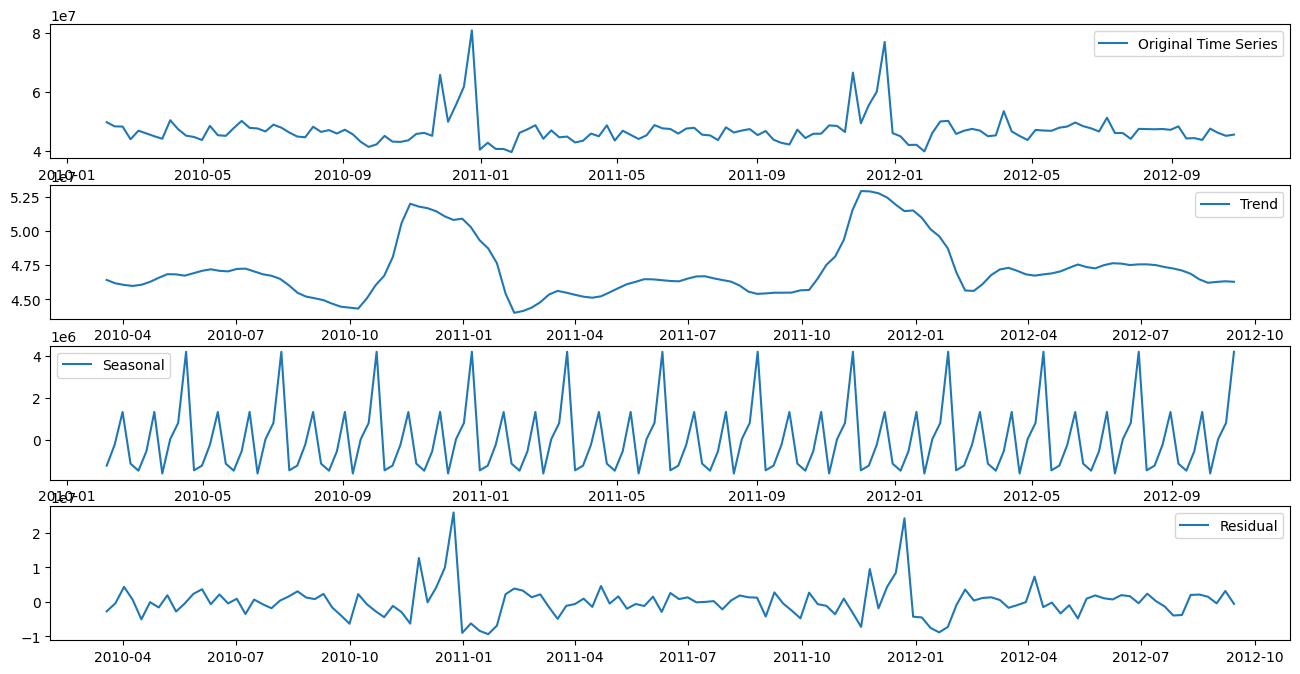

In [72]:
plt.figure(figsize=(16,8))

plt.subplot(4,1,1)
plt.plot(df_total_time_series['Weekly_Sales'], label="Original Time Series")
plt.legend()

plt.subplot(4,1,2)
plt.plot(decompose.trend, label="Trend")
plt.legend()

plt.subplot(4,1,3)
plt.plot(decompose.seasonal, label="Seasonal")
plt.legend()

plt.subplot(4,1,4)
plt.plot(decompose.resid, label="Residual")
plt.legend()


#### From this graph also we are able to see trend and seasonality exists.

# Let's try to see seasonal trend for each store.

In [73]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [78]:
def getStoreData(store:int):
    '''
    getStoreData function will return Date and Weekly_Sales as Time Series Data
    '''
    return df[df["Store"] == store][["Date","Weekly_Sales"]].set_index("Date")

In [81]:
def plotByStore(store:int):
    '''
    getStoreData function will plot Weekly_Sales against Date.
    '''
    store_data= getStoreData(store)
    store_data.plot()
    plt.title(f"Store - {store} Data")
    plt.xlabel("Date")
    plt.ylabel("Weekly_Sales")
    plt.legend()


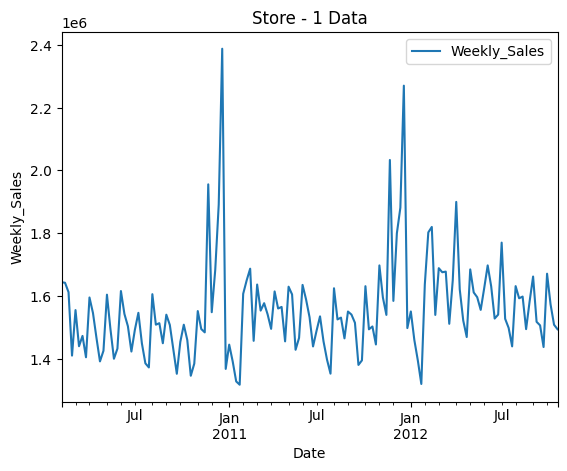

In [82]:
plotByStore(1)

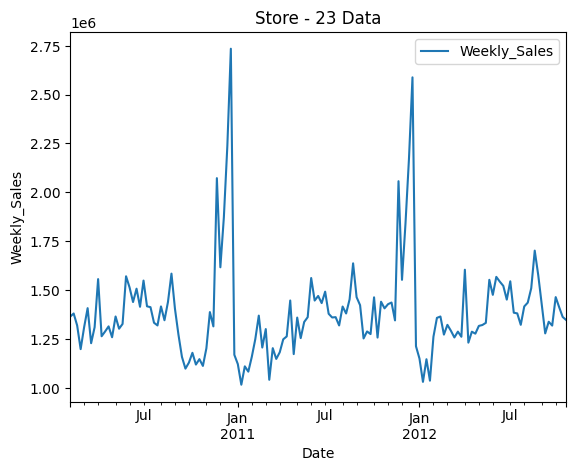

In [83]:
plotByStore(23)

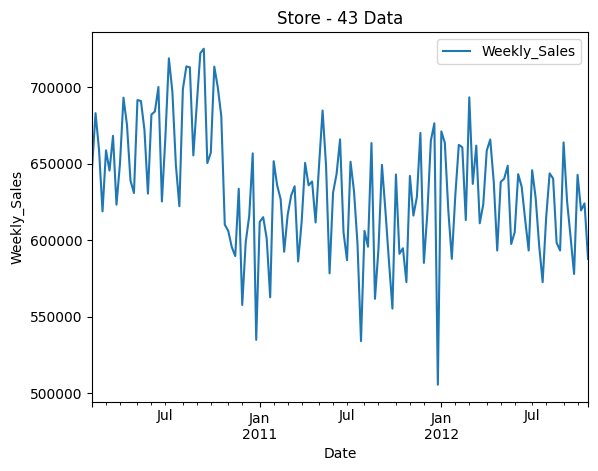

In [84]:
plotByStore(43)

#### <span style="color:lime"> Now using this plotByStore function we can plot data for any store. Using loop we can also plot data for all the store at once.

In [85]:
stores_no= df["Store"].unique()
stores_no 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [87]:
## Commenting this out as it will take a lot of space to plot all graphs. 
# for i in stores_no:
#     plotByStore(i)

#### <span style="color:magenta">1>c. Does temperature affect the weekly sales in any manner?

In [88]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

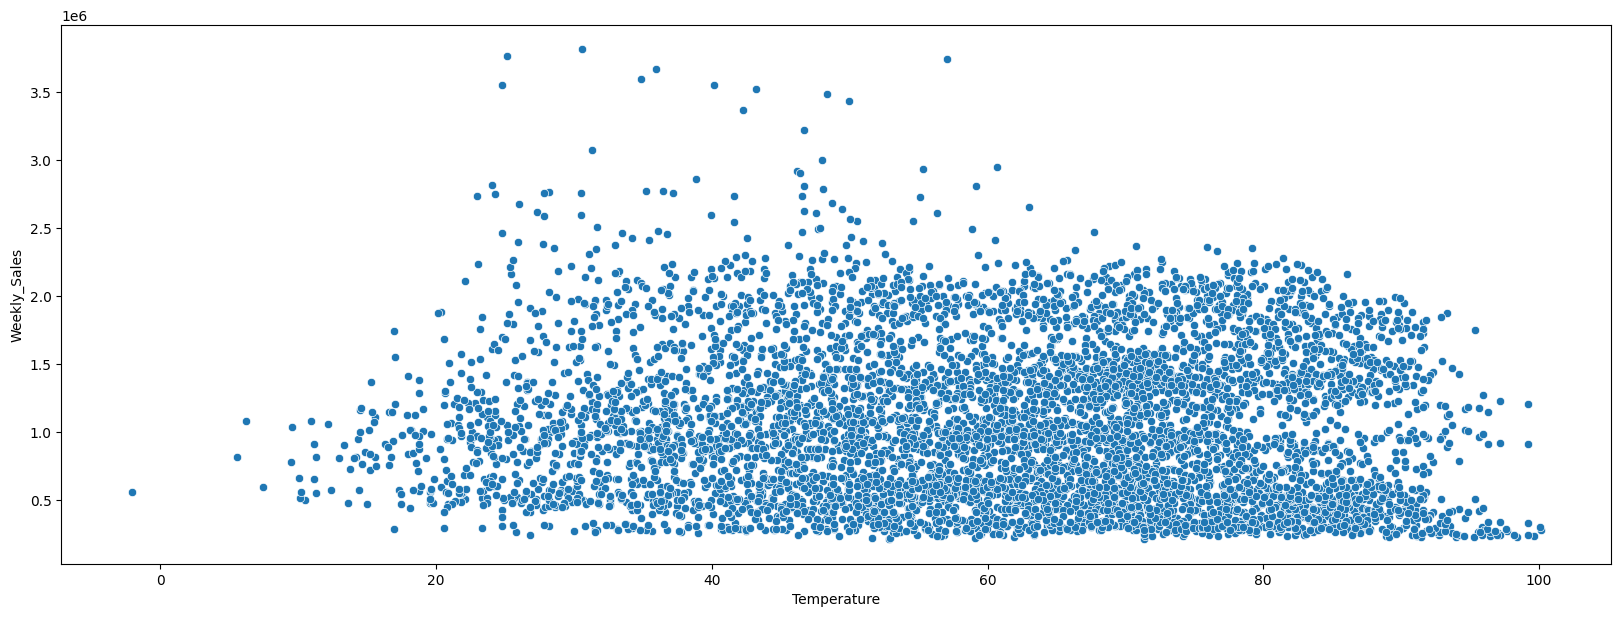

In [91]:
plt.figure(figsize=(20,7))
sns.scatterplot(x="Temperature", y="Weekly_Sales", data=df)

In [93]:
df["Weekly_Sales"].corr(df["Temperature"])

-0.06381001317946963

## <span style="color:orange; font-family:bold"> Observations
-   There does not seems to be any relation b/w weekly sales and temperature. 
-   From 20-100 degrees points seems to be equally clustered, with no special pattern to observe.
-   There are very less sales below 20 degrees which can be due to 2 main facts:-
        i-> This temperature rarely occur.
        ii-> Its too cold to go out and buy from store. Maybe too cold to open the store itself.
-   The correlation is also pretty low.

#### <span style="color:magenta">1>d. How is the Consumer Price index affecting the weekly sales of various stores?

<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

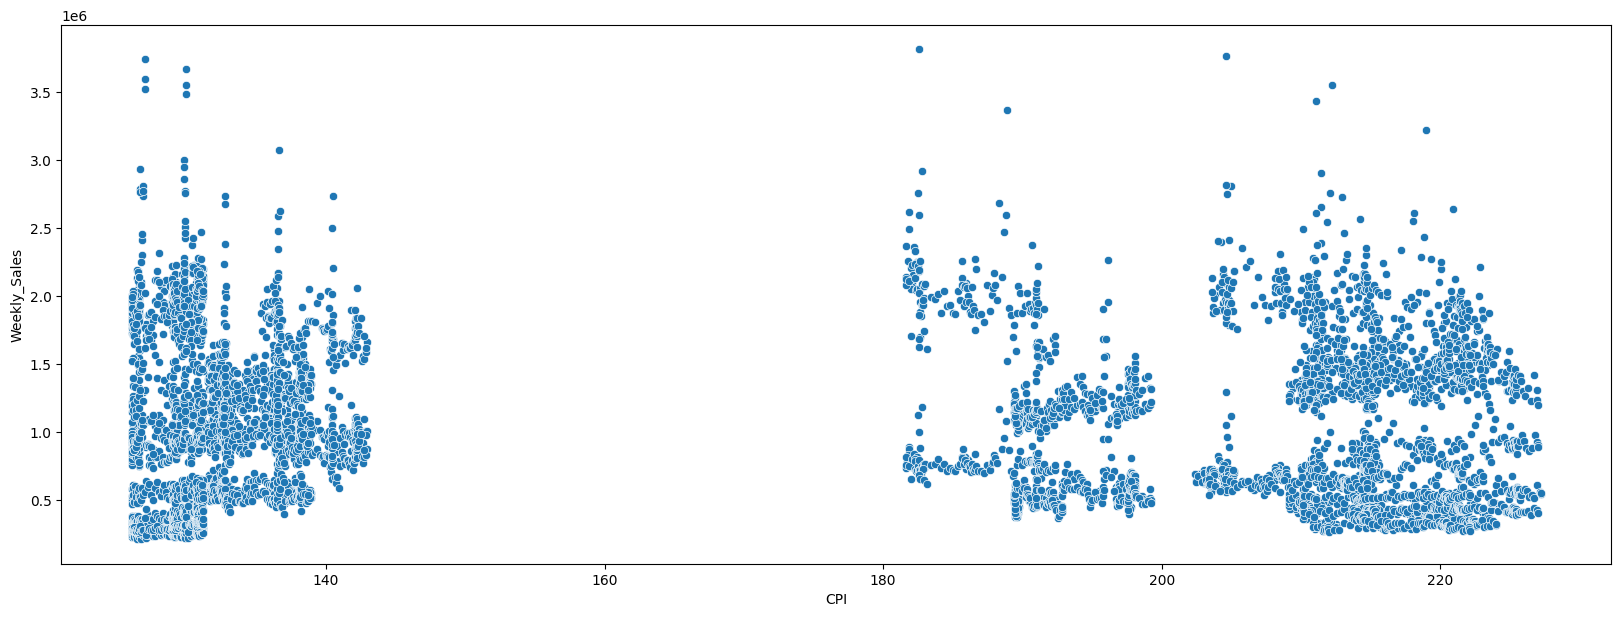

In [94]:
plt.figure(figsize=(20,7))
sns.scatterplot(x="CPI", y="Weekly_Sales", data=df)

In [96]:
df["Weekly_Sales"].corr(df["CPI"])

-0.07263416204017643

## <span style="color:orange; font-family:bold"> Observations
- There seems to be some clusters here indicating impact of CPI might not be linear(or obvious).
- Corr is low which might not be best way to judge here as CPI might impact individual stores sales more than total sales.

In [107]:
corr_list={}
for i in stores_no:
    store_ws_cpi= df[df["Store"] == i][["Weekly_Sales", "CPI"]]
    corr = store_ws_cpi["Weekly_Sales"].corr(store_ws_cpi["CPI"])
    corr_list[i]= round(corr, 4)
    print(f"Store {i} - Corr b/w Weekly Sales and CPI is {round(corr, 4)}")

Store 1 - Corr b/w Weekly Sales and CPI is 0.2254
Store 2 - Corr b/w Weekly Sales and CPI is -0.0624
Store 3 - Corr b/w Weekly Sales and CPI is 0.3172
Store 4 - Corr b/w Weekly Sales and CPI is 0.3512
Store 5 - Corr b/w Weekly Sales and CPI is 0.3083
Store 6 - Corr b/w Weekly Sales and CPI is -0.0114
Store 7 - Corr b/w Weekly Sales and CPI is 0.289
Store 8 - Corr b/w Weekly Sales and CPI is 0.1203
Store 9 - Corr b/w Weekly Sales and CPI is 0.2948
Store 10 - Corr b/w Weekly Sales and CPI is -0.1154
Store 11 - Corr b/w Weekly Sales and CPI is 0.0698
Store 12 - Corr b/w Weekly Sales and CPI is 0.0841
Store 13 - Corr b/w Weekly Sales and CPI is 0.164
Store 14 - Corr b/w Weekly Sales and CPI is -0.4198
Store 15 - Corr b/w Weekly Sales and CPI is -0.1745
Store 16 - Corr b/w Weekly Sales and CPI is 0.1243
Store 17 - Corr b/w Weekly Sales and CPI is 0.3486
Store 18 - Corr b/w Weekly Sales and CPI is -0.1935
Store 19 - Corr b/w Weekly Sales and CPI is -0.1553
Store 20 - Corr b/w Weekly Sales an

In [113]:
sorted_corr = dict(sorted(corr_list.items(), key=lambda item: abs(item[1]), reverse=True))
sorted_corr

{36: -0.9151,
 38: 0.8128,
 44: 0.7401,
 39: 0.428,
 35: -0.4241,
 14: -0.4198,
 41: 0.3923,
 42: 0.3609,
 4: 0.3512,
 17: 0.3486,
 3: 0.3172,
 5: 0.3083,
 30: -0.2982,
 9: 0.2948,
 7: 0.289,
 43: -0.2857,
 37: 0.2445,
 1: 0.2254,
 27: -0.2131,
 32: 0.1968,
 18: -0.1935,
 15: -0.1745,
 13: 0.164,
 21: -0.1636,
 19: -0.1553,
 31: 0.1329,
 26: 0.132,
 16: 0.1243,
 8: 0.1203,
 10: -0.1154,
 34: 0.1154,
 40: 0.1133,
 28: -0.0959,
 23: 0.0842,
 12: 0.0841,
 29: -0.0725,
 11: 0.0698,
 2: -0.0624,
 20: 0.0587,
 33: -0.0523,
 22: -0.0386,
 45: -0.0235,
 24: -0.0137,
 6: -0.0114,
 25: -0.0109}

<Axes: >

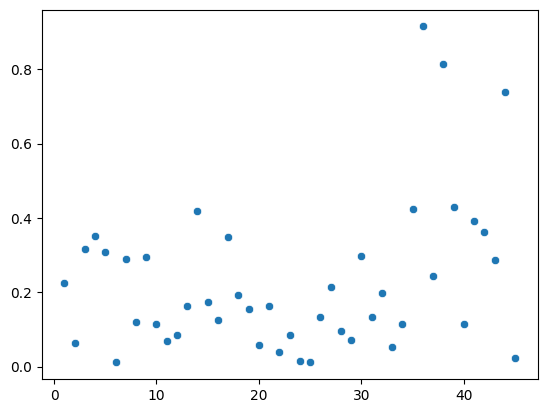

In [125]:
keys = list(sorted_corr.keys())
values = [abs(value) for value in sorted_corr.values()]

# Creating a scatter plot
sns.scatterplot(x=keys, y=values)

In [128]:
# %pip install plotly

In [130]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=keys, y=values, mode='markers', marker=dict(size=12)))

fig.update_layout(title='Scatter Plot with Absolute Values',
                  xaxis_title='Keys',
                  yaxis_title='Absolute Values')


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'size': 12},
              'mode': 'markers',
              'type': 'scatter',
              'x': [36, 38, 44, 39, 35, 14, 41, 42, 4, 17, 3, 5, 30, 9, 7, 43, 37,
                    1, 27, 32, 18, 15, 13, 21, 19, 31, 26, 16, 8, 10, 34, 40, 28,
                    23, 12, 29, 11, 2, 20, 33, 22, 45, 24, 6, 25],
              'y': [0.9151, 0.8128, 0.7401, 0.428, 0.4241, 0.4198, 0.3923, 0.3609,
                    0.3512, 0.3486, 0.3172, 0.3083, 0.2982, 0.2948, 0.289, 0.2857,
                    0.2445, 0.2254, 0.2131, 0.1968, 0.1935, 0.1745, 0.164, 0.1636,
                    0.1553, 0.1329, 0.132, 0.1243, 0.1203, 0.1154, 0.1154, 0.1133,
                    0.0959, 0.0842, 0.0841, 0.0725, 0.0698, 0.0624, 0.0587, 0.0523,
                    0.0386, 0.0235, 0.0137, 0.0114, 0.0109]}],
    'layout': {'template': '...',
               'title': {'text': 'Scatter Plot with Absolute Values'},
               'xaxis': {'title': {'text': 'Keys'}},
               'yaxis': {'title': {'text': 'Absolute Values'}}}
})

In [133]:
print("Here we can see in order which stores are impacted most by CPI - \n", sorted_corr)

Here we can see in order which stores are impacted most by CPI - 
 {36: -0.9151, 38: 0.8128, 44: 0.7401, 39: 0.428, 35: -0.4241, 14: -0.4198, 41: 0.3923, 42: 0.3609, 4: 0.3512, 17: 0.3486, 3: 0.3172, 5: 0.3083, 30: -0.2982, 9: 0.2948, 7: 0.289, 43: -0.2857, 37: 0.2445, 1: 0.2254, 27: -0.2131, 32: 0.1968, 18: -0.1935, 15: -0.1745, 13: 0.164, 21: -0.1636, 19: -0.1553, 31: 0.1329, 26: 0.132, 16: 0.1243, 8: 0.1203, 10: -0.1154, 34: 0.1154, 40: 0.1133, 28: -0.0959, 23: 0.0842, 12: 0.0841, 29: -0.0725, 11: 0.0698, 2: -0.0624, 20: 0.0587, 33: -0.0523, 22: -0.0386, 45: -0.0235, 24: -0.0137, 6: -0.0114, 25: -0.0109}


#### <span style="color:magenta">1>e. Top performing stores according to the historical data?

In [135]:
StorePerformanceSalesSum= df.groupby("Store")[["Weekly_Sales"]].sum()

In [140]:
print("Lowest Performing Stores bases on Weekly Sales Sum : \n", StorePerformanceSalesSum.sort_values("Weekly_Sales")[:5])

Lowest Performing Stores bases on Weekly Sales Sum : 
        Weekly_Sales
Store              
33      37160221.96
44      43293087.84
5       45475688.90
36      53412214.97
38      55159626.42


In [141]:
print("Highest Performing Stores bases on Weekly Sales Sum : \n",StorePerformanceSalesSum.sort_values("Weekly_Sales", ascending=False)[:5])

Highest Performing Stores bases on Weekly Sales Sum : 
        Weekly_Sales
Store              
20     3.013978e+08
4      2.995440e+08
14     2.889999e+08
13     2.865177e+08
2      2.753824e+08


In [142]:
StorePerformanceSalesAverage= df.groupby("Store")[["Weekly_Sales"]].mean()

In [143]:
print("Lowest Performing Stores bases on Weekly Sales Mean : \n", StorePerformanceSalesAverage.sort_values("Weekly_Sales")[:5])

Lowest Performing Stores bases on Weekly Sales Mean : 
         Weekly_Sales
Store               
33     259861.692028
44     302748.866014
5      318011.810490
36     373511.992797
38     385731.653287


In [144]:
print("Highest Performing Stores bases on Weekly Sales Mean : \n",StorePerformanceSalesAverage.sort_values("Weekly_Sales", ascending=False)[:5])

Highest Performing Stores bases on Weekly Sales Mean : 
        Weekly_Sales
Store              
20     2.107677e+06
4      2.094713e+06
14     2.020978e+06
13     2.003620e+06
2      1.925751e+06


#### Sales Performance are similar with sum and mean, which was expected as data was equally distributed.

#### <span style="color:magenta">1>f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [147]:
best_performing_store= StorePerformanceSalesSum.sort_values("Weekly_Sales", ascending=False)[:1]
print(best_performing_store)

       Weekly_Sales
Store              
20     3.013978e+08


In [148]:
worst_performing_store= StorePerformanceSalesSum.sort_values("Weekly_Sales")[:1]
print(worst_performing_store)

       Weekly_Sales
Store              
33      37160221.96


In [152]:
difference_performance= best_performing_store.Weekly_Sales.iloc[0] - worst_performing_store.Weekly_Sales.iloc[0]
print(f"Difference in Best and Worst Store Performance= {difference_performance}")

Difference in Best and Worst Store Performance= 264237570.49999997


In [155]:
print(f"The difference in Sales of Best and Worst performing Stores is QUITE HIGH. Its about {round(best_performing_store.Weekly_Sales.iloc[0]/worst_performing_store.Weekly_Sales.iloc[0], 0)} times high.")

The difference in Sales of Best and Worst performing Stores is QUITE HIGH. Its about 8.0 times high.


### <span style="color:magenta">2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

I am going to use <span style="color:orange">SARIMAX</span> model here for forecasting sales. Sarimax model will only include Date and Weekly Sales on Prediction for next 12 weeks. Since we have more columns that may or maynot impact the sales prediction for the future,<span style="font-family:italic"> a model like random forest (or any regression model) can also be used to determine the sales but for that we will need all data for next 12 weeks which we don't have here</span>. So I will proceed with SARIMAX model,

In [160]:
forecasting_data_all= df.groupby("Date")[["Weekly_Sales"]].sum()
print(forecasting_data_all)

            Weekly_Sales
Date                    
2010-02-05   49750740.50
2010-02-12   48336677.63
2010-02-19   48276993.78
2010-02-26   43968571.13
2010-03-05   46871470.30
...                  ...
2012-09-28   43734899.40
2012-10-05   47566639.31
2012-10-12   46128514.25
2012-10-19   45122410.57
2012-10-26   45544116.29

[143 rows x 1 columns]


<Axes: xlabel='Date'>

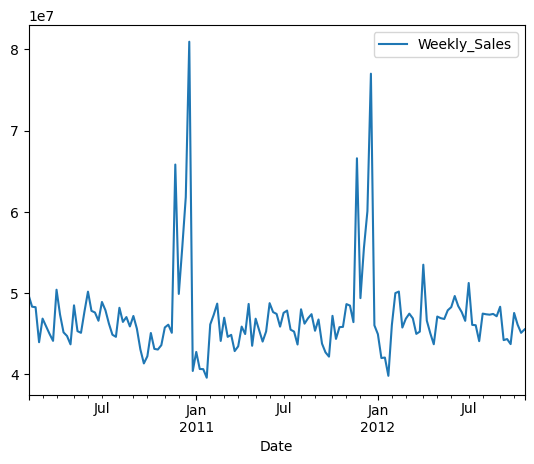

In [161]:
forecasting_data_all.plot()

### Testing for Stationary Data

In [165]:
from statsmodels.tsa.stattools import adfuller

adfuller(forecasting_data_all["Weekly_Sales"])

(-5.9082979571863365,
 2.675979158985984e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 4314.46014989216)

In [163]:
# H0 -> Data is Not Stationary
# Ha -> Data is Stationary 

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [164]:
adfuller_test(forecasting_data_all["Weekly_Sales"])

ADF Test Statistic : -5.9082979571863365
p-value : 2.675979158985984e-07
#Lags Used : 4
Number of Observations Used : 138
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


    Data is stationary here

### Plotting ACF and PACF for MA and AR Models.

In [166]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

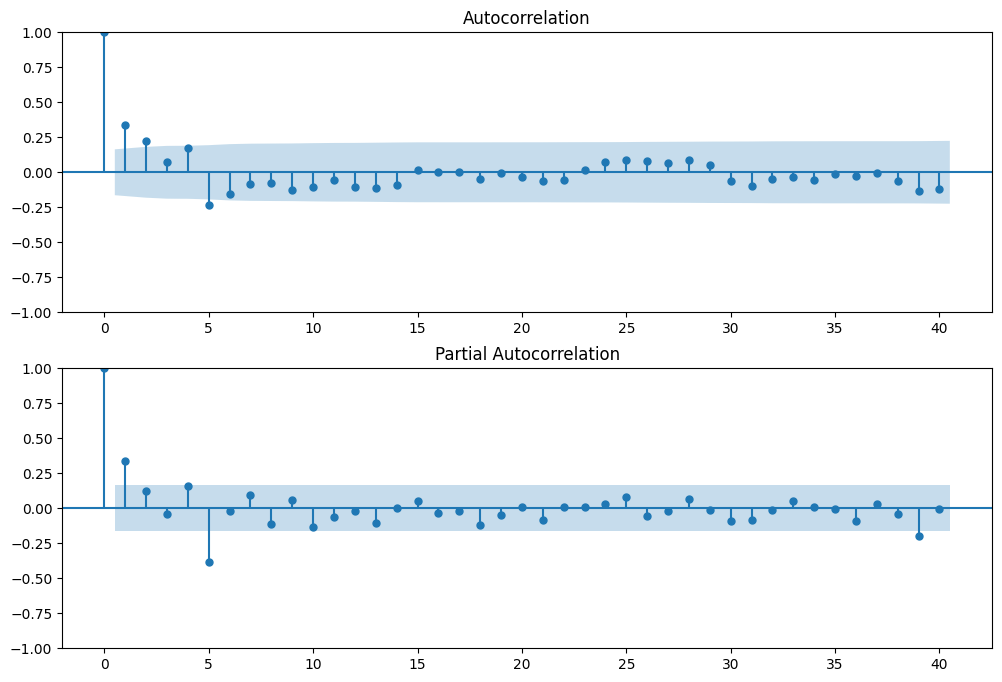

In [177]:
fig= plt.figure(figsize=(12, 8))

ax1= fig.add_subplot(211)
fig= plot_acf(forecasting_data_all["Weekly_Sales"], lags=40, ax=ax1)
ax2= fig.add_subplot(212)
fig= plot_pacf(forecasting_data_all["Weekly_Sales"], lags=40, ax=ax2)

From plots we can determine MA= 2/3 and AR= 3

### SARIMAX Model

In [169]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [245]:
model= SARIMAX(forecasting_data_all["Weekly_Sales"], order=(3, 1, 3), seasonal_order=(3, 1, 3, 52))
results= model.fit()

In [241]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 52)   Log Likelihood               -1430.606
Date:                            Sun, 24 Dec 2023   AIC                           2887.212
Time:                                    15:43:20   BIC                           2919.709
Sample:                                02-05-2010   HQIC                          2900.317
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6564      0.264     -2.488      0.013      -1.174      -0.139
ar.L2         -0.6531      0.226     -2.893      0.004      -1.095      -0.211
ar.L3         -0.7071      0.215     -3.288      0.001      -1.129      -0.286
ma.L1          0.5577      0.267      2.087      0.037       0.034       1.082
ma.L2          0.6043      0.245      2.464      0.014       0.124       1.085
ma.L3          0.6480      0.220      2.950      0.003       0.218       1.079
ar.S.L52      -0.0743    794.618  -9.35e-05      1.000   -1557.497    1557.348
ar.S.L104     -0.0261   1013.777  -2.57e-05      1.000   -1986.992    1986.940
ar.S.L156      0.3009    268.999      0.001      0.999    -526.928     527.530
ma.S.L52      -0.0779   1306.747  -5.96e-05      1.000   -2561.254    2561.098
ma.S.L104     -0.0759   1704.881  -4.45e-05      1.000   -3341.580    3341.429
ma.S.L156      0.2749    210.452      0.001      0.999    -412.203     412.753
sigma2      2.941e+12    1.1e-09   2.67e+21      0.000    2.94e+12    2.94e+12
===================================================================================
Ljung-Box (L1) (Q):                  13.04   Jarque-Bera (JB):                 4.16
Prob(Q):                              0.00   Prob(JB):                         0.12
Heteroskedasticity (H):               1.67   Skew:                             0.09
Prob(H) (two-sided):                  0.16   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.63e+40. Standard errors may be unstable.
"""

In [242]:
forecasting_data_all.shape

(143, 2)

In [243]:
forecasting_data_all["forecastSarimax"] = results.predict(start=120, end=142, dynamic=True)

<Axes: xlabel='Date'>

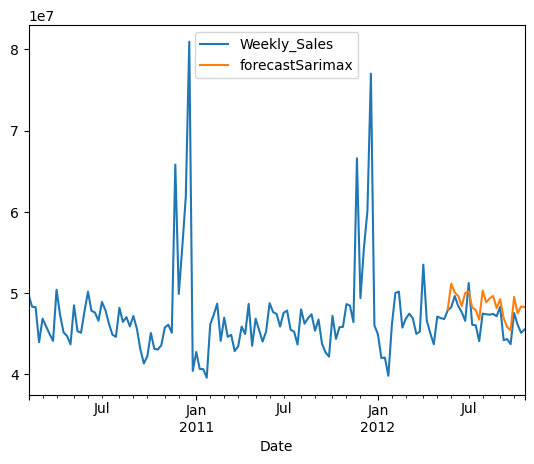

In [244]:
forecasting_data_all[["Weekly_Sales", "forecastSarimax"]].plot()

### Looks Close enough

In [252]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# import itertools

# # Let's use trial and error for best p, d, q values
# p_values = range(0, 5)
# d_values = range(0, 2)
# q_values = range(0, 5)
# seasonal_p_values = range(0, 5)
# seasonal_d_values = range(0, 2)
# seasonal_q_values = range(0, 5)

# param_combinations = list(itertools.product(p_values, d_values, q_values, seasonal_p_values, seasonal_d_values, seasonal_q_values))

# best_params = None
# min_aic = float('inf')

# for params in param_combinations:
#     p, d, q, seasonal_p, seasonal_d, seasonal_q = params

#     # Fit the SARIMAX model
#     model = SARIMAX(
#         forecasting_data_all["Weekly_Sales"],
#         order=(p, d, q),
#         seasonal_order=(seasonal_p, seasonal_d, seasonal_q, 52)
#     )
#     results = model.fit()

#     # Check AIC
#     aic = results.aic

#     # Update best parameters if current AIC is lower
#     if aic < min_aic:
#         min_aic = aic
#         best_params = params

# # Print the best parameters
# print("Best Parameters (p, d, q, seasonal_p, seasonal_d, seasonal_q):", best_params)


KeyboardInterrupt: 

<Axes: xlabel='Date'>

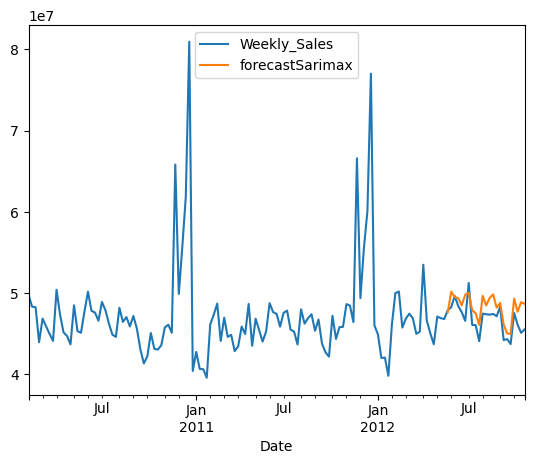

In [248]:
model= SARIMAX(forecasting_data_all["Weekly_Sales"], order=(4, 1, 3), seasonal_order=(4, 1, 3, 52))
results= model.fit()

forecasting_data_all["forecastSarimax"] = results.predict(start=120, end=142, dynamic=True)

forecasting_data_all[["Weekly_Sales", "forecastSarimax"]].plot()

<Axes: xlabel='Date'>

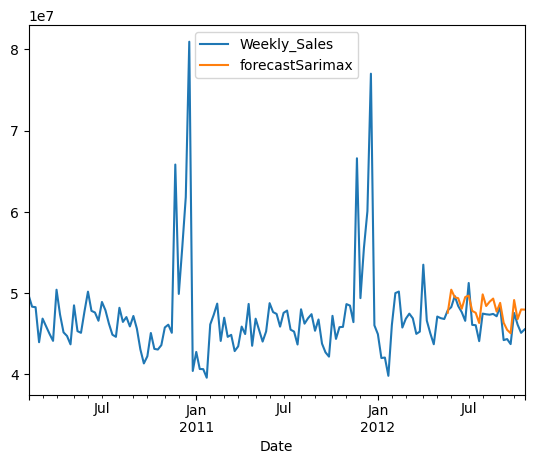

In [254]:
# model= SARIMAX(forecasting_data_all["Weekly_Sales"], order=(4, 1, 2), seasonal_order=(4, 1, 2, 52))
# results= model.fit()

# forecasting_data_all["forecastSarimax"] = results.predict(start=120, end=142, dynamic=True)

# forecasting_data_all[["Weekly_Sales", "forecastSarimax"]].plot()

In [255]:
forecasting_data_all.tail()

,Weekly_Sales,forecastSarimax
Date,,
2012-09-28,43734899.40,4.507014e+07
2012-10-05,47566639.31,4.915436e+07
2012-10-12,46128514.25,4.681143e+07
2012-10-19,45122410.57,4.799653e+07
2012-10-26,45544116.29,4.797886e+07


In [259]:
# Predicting for next 12 Weeks
future_dates=[forecasting_data_all.index[-1]+ pd.DateOffset(weeks=x)for x in range(0,13)]
print(future_dates)

[Timestamp('2012-10-26 00:00:00'), Timestamp('2012-11-02 00:00:00'), Timestamp('2012-11-09 00:00:00'), Timestamp('2012-11-16 00:00:00'), Timestamp('2012-11-23 00:00:00'), Timestamp('2012-11-30 00:00:00'), Timestamp('2012-12-07 00:00:00'), Timestamp('2012-12-14 00:00:00'), Timestamp('2012-12-21 00:00:00'), Timestamp('2012-12-28 00:00:00'), Timestamp('2013-01-04 00:00:00'), Timestamp('2013-01-11 00:00:00'), Timestamp('2013-01-18 00:00:00')]


In [263]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=forecasting_data_all.columns)

In [264]:
future_df=pd.concat([forecasting_data_all,future_datest_df])

In [265]:
future_df.tail()

,Weekly_Sales,forecastSarimax
2012-12-21,NaN,NaN
2012-12-28,NaN,NaN
2013-01-04,NaN,NaN
2013-01-11,NaN,NaN
2013-01-18,NaN,NaN


In [267]:
future_df.shape

(155, 2)

<Axes: >

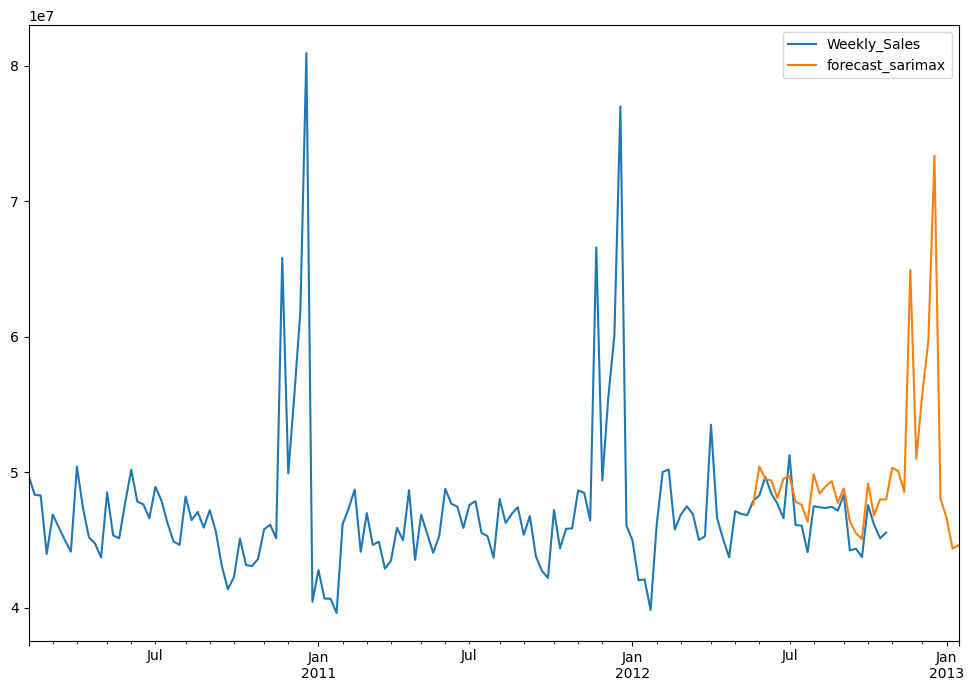

In [270]:
future_df['forecast_sarimax'] = results.predict(start = 120, end = 154, dynamic= True)  
future_df[['Weekly_Sales', 'forecast_sarimax']].plot(figsize=(12, 8))

## Seems Close enough- Trend has been captued and model can be improved by hyperparametertuning but it will take days to train for all stores.

## Let's Use-  order=(4, 1, 3) for each store. This might not be optimal way but using hyperparameter for each store was taking too long on my system(took 3 hrs with no result). So I an going to use  order=(4, 1, 3) value only for prediction for each store.

KeyboardInterrupt: 

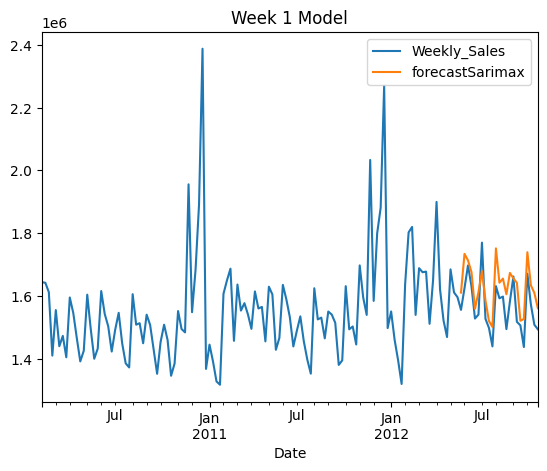

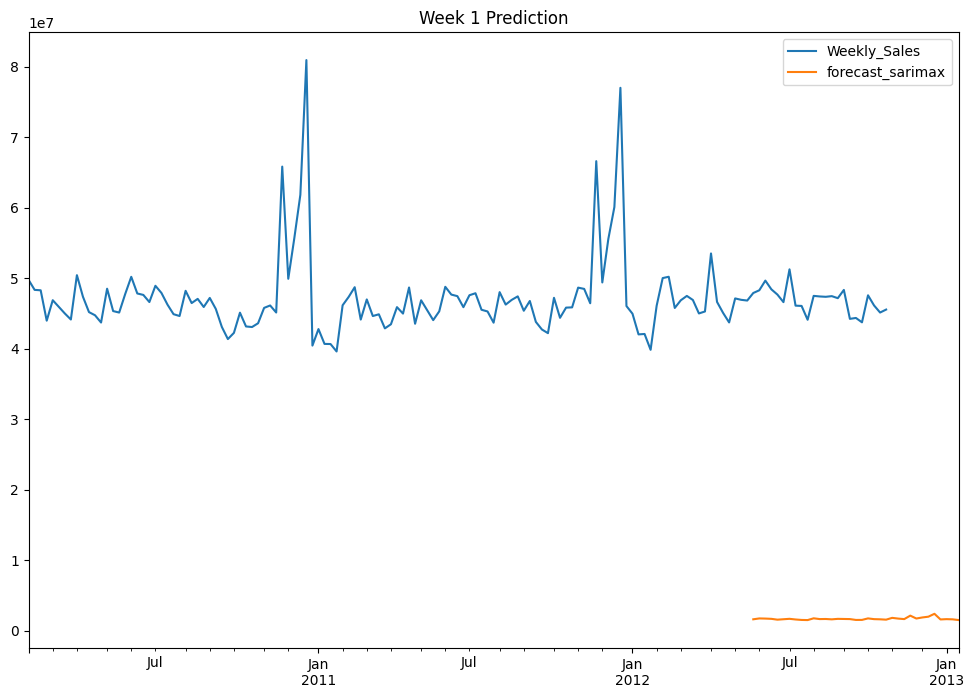

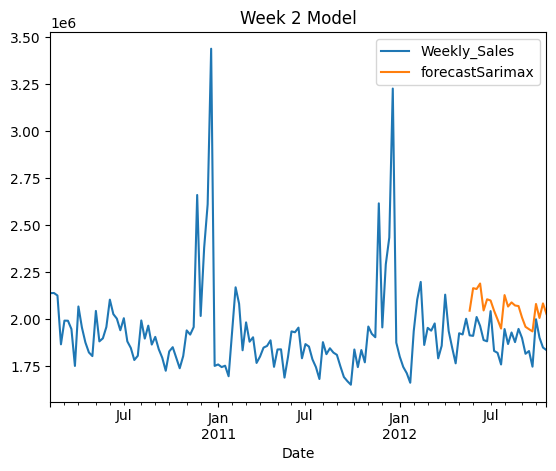

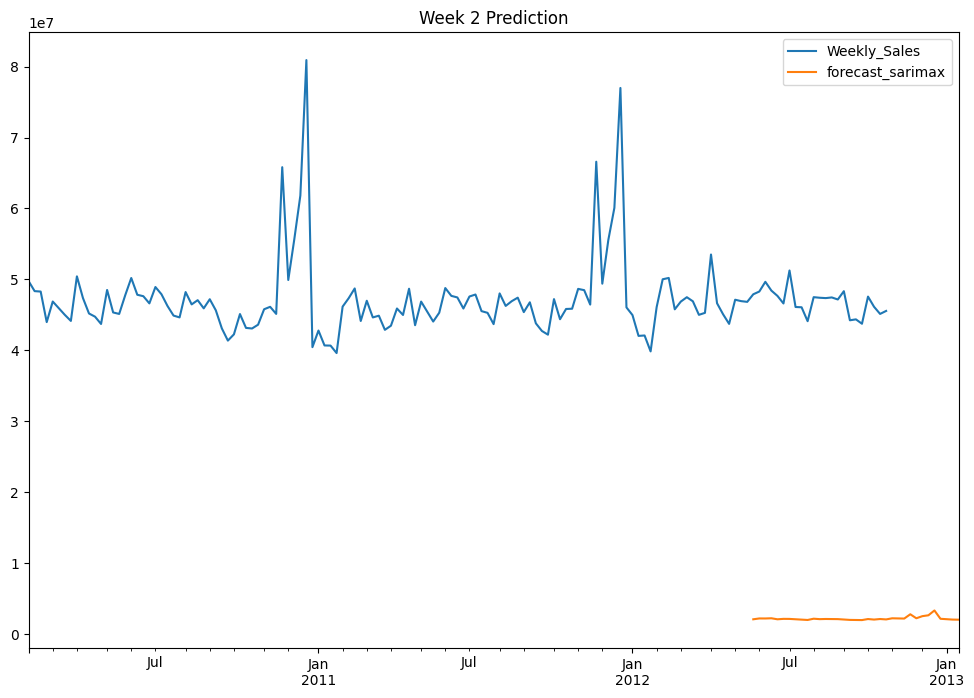

In [272]:
for i in stores_no:
    store_data_forecast= getStoreData(i)
    
    model= SARIMAX(store_data_forecast["Weekly_Sales"], order=(4, 1, 3), seasonal_order=(4, 1, 3, 52))
    results= model.fit()

    store_data_forecast["forecastSarimax"] = results.predict(start=120, end=142, dynamic=True)
    
    store_data_forecast[["Weekly_Sales", "forecastSarimax"]].plot()
    plt.title(f"Week {i} Model")

    future_dates=[store_data_forecast.index[-1]+ pd.DateOffset(weeks=x)for x in range(0,13)]
    future_datest_df=pd.DataFrame(index=future_dates[1:],columns=store_data_forecast.columns)

    future_df=pd.concat([forecasting_data_all,future_datest_df])

    future_df['forecast_sarimax'] = results.predict(start = 120, end = 154, dynamic= True)  
    future_df[['Weekly_Sales', 'forecast_sarimax']].plot(figsize=(12, 8))
    plt.title(f"Week {i} Prediction")

    